# Capstone Project Final < Week 4 >

## 1. Introduction <br>

There have been many Mexican students studying at Embry-Riddle Aeronuatical University and University of Florida. Marcos Cuevas has a plan to open a Mexican Restuarant after his retirement but he is not sure of which school among them has more potential customers. Thus he asked an analysis of the areas to this researcher.


Question that will be answers at the end of this project : Whcih location amonb ERAU and UF is better for Mexcian Cuisine?



# 2. Data<br>
To figure out the better place to open a Mexican restaurant among Daytona Beach,FL(Embry-Riddle Aeronautical University) and Gainsville, FL(University of Florida), the researcher needs following data: </b> <b>
    1) The location of Daytona Beach, FL. </b><b> 2) THe location of Gainsville, FL  3) The number of Mexican resturants in each area.


## 3. Methodology <B>
    
We begin by quering the location data of Daytona Beach(where Embry-Riddle Aeronautical University is) and Gainsville(where University of Florida is).
We will find all venues for each neighborhood using FourSquare API.
We will then filter out Mexican Restuarant venues.
Finally, we will visualize the data using python's Folium library and matplotlib library.
To update the Data we need mentioned above, the researcher import several libraries needed as below. 

In [4]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
!pip install geocoder
import geocoder
import os
!pip install folium
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
from pandas.io.json import json_normalize

print('Libraries imported.')


  Using cached https://files.pythonhosted.org/packages/4f/6b/13166c909ad2f2d76b929a4227c952630ebaf0d729f6317eb09cbceccbab/geocoder-1.38.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/45/1e/0c169c6a5381e241ba7404532c16a21d86ab872c9bed8bdcd4c423954103/requests-2.24.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ee/ff/48bde5c0f013094d729fe4b0316ba2a24774b3ff1c52d924a8a4cb04078a/six-1.15.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f2/98/7e6d147fd16a10a5f821db6e25f192265d6ecca3d82957a4fdd592cad49c/ratelim-0.1.6-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d2/3d/fa76db83bf75c4f8d338c2fd15c8d33fdd7ad23a9b5e57eb6c5de26b430e/click-7.1.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/9f/f0/a391d1463ebb1b233795cabfc0ef38d3db4442339de68f847026199e69d7/urllib3-1.25.10-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc

  Using cached https://files.pythonhosted.org/packages/5e/c4/6c4fe722df5343c33226f0b4e0bb042e4dc13483228b4718baf286f86d87/certifi-2020.6.20-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/9f/f0/a391d1463ebb1b233795cabfc0ef38d3db4442339de68f847026199e69d7/urllib3-1.25.10-py2.py3-none-any.whl
tensorflow 1.13.1 requires tensorboard<1.14.0,>=1.13.0, which is not installed.
ibm-cos-sdk-core 2.6.0 has requirement requests<2.23,>=2.18, but you'll have requests 2.24.0 which is incompatible.
botocore 1.12.82 has requirement urllib3<1.25,>=1.20, but you'll have urllib3 1.25.10 which is incompatible.
Target directory /home/spark/shared/user-libs/python3.6/markupsafe already exists. Specify --upgrade to force replacement.
Target directory /home/spark/shared/user-libs/python3.6/Jinja2-2.11.2.dist-info already exists. Specify --upgrade to force replacement.
Target directory /home/spark/shared/user-libs/python3.6/numpy.libs already exists. Specify --upgrade to force replac

Then, the researcher will figure out the geographical coordiantes of ERAU and UF via geolocator and use 'FourSquare API' to pull up the venues of the area.

In [13]:
addressERAU = 'Daytona Beach, FL'

geolocator = Nominatim(user_agent="DB_explorer")
locationERAU = geolocator.geocode(addressERAU)
latitudeERAU = locationERAU.latitude
longitudeERAU = locationERAU.longitude
print('The geograpical coordinate of ERAU are {}, {}.'.format(latitudeERAU, longitudeERAU))

The geograpical coordinate of ERAU are 29.2108147, -81.0228331.


In [14]:
ERAU_LATITUDE = '29.2108147'
ERAU_LONGITUDE = '-81.0228331'
print('The geograpical coordinates of Embry-Riddle Aeronautical University are {}, {}.'.format(ERAU_LATITUDE, ERAU_LONGITUDE))

The geograpical coordinates of Embry-Riddle Aeronautical University are 29.2108147, -81.0228331.


In [15]:
erau_map = folium.Map(location = [ERAU_LATITUDE, ERAU_LONGITUDE], zoom_start = 10)
folium.Marker([ERAU_LATITUDE, ERAU_LONGITUDE]).add_to(erau_map)

erau_map

In [16]:
CLIENT_ID = '1T22TQ4SRULMUL1KUVEJI2N1W1VDLGOTFDK0WEK4TZRT3ZHB' # your Foursquare ID
CLIENT_SECRET = 'KH0DR4PX3ZE5H5FKLBFU5URRQDAI4N1SBVE1K2S1GEHN3KDZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1T22TQ4SRULMUL1KUVEJI2N1W1VDLGOTFDK0WEK4TZRT3ZHB
CLIENT_SECRET:KH0DR4PX3ZE5H5FKLBFU5URRQDAI4N1SBVE1K2S1GEHN3KDZ


In [17]:
limit= 100 
radius= 4000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, 
                                                                        CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        ERAU_LATITUDE, 
                                                                        ERAU_LONGITUDE, 
                                                                        radius,
                                                                        limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f1db010a999e1666e46bb36'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Daytona Beach',
  'headerFullLocation': 'Daytona Beach',
  'headerLocationGranularity': 'city',
  'totalResults': 134,
  'suggestedBounds': {'ne': {'lat': 29.246814736000037,
    'lng': -80.98166492205793},
   'sw': {'lat': 29.174814663999964, 'lng': -81.06400127794207}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b50ed40f964a520033927e3',
       'name': 'Ronin Sushi & Sake Bar',
       'location': {'address': '111 W International Speedway Blvd',
        'crossStreet': 'at Beach St',
        'lat': 29.21193552728543,
        

In [18]:
def get_category_type(row):  
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
venues = results['response']['groups'][0]['items']
    
ERAU_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
ERAU_venues =ERAU_venues.loc[:, filtered_columns]

# filter the category for each row
ERAU_venues['venue.categories'] = ERAU_venues.apply(get_category_type, axis=1)

# clean columns
ERAU_venues.columns = [col.split(".")[-1] for col in ERAU_venues.columns]

ERAU_venues



,name,categories,lat,lng
0,Ronin Sushi & Sake Bar,Sushi Restaurant,29.211936,-81.019982
1,Tia Cori's Tacos,Mexican Restaurant,29.214460,-81.020603
2,Wawa,Convenience Store,29.209598,-81.022970
3,Kale Cafe,Juice Bar,29.212512,-81.019704
4,Zen Bistro,Thai Restaurant,29.208942,-81.021040
5,Siam Spice,Thai Restaurant,29.213920,-81.020513
6,Atlantic Sounds Records,Music Venue,29.211858,-81.020561
7,The Cellar Restaurant,Italian Restaurant,29.209560,-81.021138
8,Radiology Associates Field at Jackie Robinson ...,Baseball Stadium,29.209208,-81.016048
9,Angell & Phelps Chocolate Factory,Chocolate Shop,29.210767,-81.018809


In [26]:

ERAUlocations = ERAU_venues[['lat', 'lng']]
ERAUlocation = ERAUlocations.values.tolist()

map = folium.Map(location=[ERAU_LATITUDE, ERAU_LONGITUDE], zoom_start=15)

for point in range(0, len(ERAUlocation)):
    folium.CircleMarker(ERAUlocation[point], fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2, popup=ERAUlocation[point]).add_to(map)
map

In [27]:

ERAUMex = ERAU_venues[ERAU_venues['categories'].str.contains("Mexican Restaurant")]

ERAUMex

,name,categories,lat,lng
1,Tia Cori's Tacos,Mexican Restaurant,29.214460,-81.020603
90,Maria Bonita,Mexican Restaurant,29.178873,-81.006154


In [28]:
ERAU_counts= pd.DataFrame(ERAUMex['categories'].value_counts())
ERAU_counts.rename(columns={'Categories':'Categories','categories':'value_counts'} , 
                 inplace=True)
 

ERAU_counts.index.name ='Categories'
ERAU_counts

,value_counts
Categories,
Mexican Restaurant,2


In [33]:
UFaddress = 'Gainesville, FL'

geolocatorUF = Nominatim(user_agent="PO_explorer")
locationUF = geolocatorUF.geocode(UFaddress)
latitudeUF = locationUF.latitude
longitudeUF = locationUF.longitude
print('The geograpical coordinate of University of Florida are {}, {}.'.format(latitudeUF, longitudeUF))

The geograpical coordinate of University of Florida are 29.6519684, -82.3249846.


In [37]:
UF_LATITUDE = '29.6519684'
UF_LONGITUDE = '-82.3249846'
print('The geograpical coordinates of University of Florida are {}, {}.'.format(latitudeUF, longitudeUF))

The geograpical coordinates of University of Florida are 29.6519684, -82.3249846.


In [39]:
limit= 100 
radius= 4000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, 
                                                                        CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        latitudeUF, 
                                                                        longitudeUF, 
                                                                        radius,
                                                                        limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f1db232d031031d4d9abf39'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Gainesville',
  'headerFullLocation': 'Gainesville',
  'headerLocationGranularity': 'city',
  'totalResults': 132,
  'suggestedBounds': {'ne': {'lat': 29.687968436000038,
    'lng': -82.28363719515984},
   'sw': {'lat': 29.615968363999965, 'lng': -82.36633200484015}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '55319302498ebe4679392fcd',
       'name': 'Mojo Hogtown Bar-B-Que',
       'location': {'address': '12 SE 2nd Ave',
        'lat': 29.650393178594395,
        'lng': -82.32440050266635,
        'labeledLatLngs': [{'label

In [40]:
def get_category_type(row):  
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [41]:
venues = results['response']['groups'][0]['items']
    
UF_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
UF_venues =UF_venues.loc[:, filtered_columns]

# filter the category for each row
UF_venues['venue.categories'] = UF_venues.apply(get_category_type, axis=1)

# clean columns
UF_venues.columns = [col.split(".")[-1] for col in UF_venues.columns]

UF_venues



,name,categories,lat,lng
0,Mojo Hogtown Bar-B-Que,BBQ Joint,29.650393,-82.324401
1,Dragonfly Sushi & Sake Co,Sushi Restaurant,29.650195,-82.323877
2,The Hyppo,Dessert Shop,29.650262,-82.323710
3,The Bull,Bar,29.651223,-82.325780
4,Paramount Grill,American Restaurant,29.651172,-82.325640
5,Manuel's Vintage Room,Italian Restaurant,29.651684,-82.325073
6,Gainesville House of Beer,Pub,29.651888,-82.325752
7,Bo Diddley Community Plaza,Plaza,29.651445,-82.323459
8,The Backyard,Beer Garden,29.649454,-82.324478
9,Hippodrome Theatre,Theater,29.649489,-82.323918


In [47]:

UFlocations = UF_venues[['lat', 'lng']]
UFlocation = UFlocations.values.tolist()

map = folium.Map(location=[latitudeUF,longitudeUF], zoom_start=15)

for point in range(0, len(UFlocation)):
    folium.CircleMarker(UFlocation[point], fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2, popup=UFlocation[point]).add_to(map)
map


In [49]:

UFMex = UF_venues[UF_venues['categories'].str.contains("Mexican Restaurant")]

UFMex

,name,categories,lat,lng
25,Boca Fiesta,Mexican Restaurant,29.649471,-82.324262
35,El Indio,Mexican Restaurant,29.655098,-82.339106
60,La Tienda Latina,Mexican Restaurant,29.631585,-82.339523
67,Chipotle Mexican Grill,Mexican Restaurant,29.652292,-82.341497
74,Chipotle Mexican Grill,Mexican Restaurant,29.673369,-82.338802


In [50]:
UF_counts= pd.DataFrame(UFMex['categories'].value_counts())
UF_counts.rename(columns={'Categories':'Categories','categories':'value_counts'} , 
                 inplace=True)
 

UF_counts.index.name ='Categories'
UF_counts

,value_counts
Categories,
Mexican Restaurant,5


## 4. Result <b>
After performing the Data Analysis, we can figure out that in ERAU area, there are 2 Mexican Restaurants, and in UF area, there are 5 Mexican Restaurants.

In [67]:
Result = pd.DataFrame({'Area': ['ERAU Area','UF Area'],
        'Counts': [2,5]
        })



Result.set_index('Area')

Result

,Area,Counts
0,ERAU Area,2
1,UF Area,5


## 5. Conclusion<b>
    When we visulize the result, there are more Mexican restaurnats in UF area. Hence, the researcher suggest to open a Mexican Restaurant in ERAU Area to the client.

Text(0, 0.5, 'Counts')

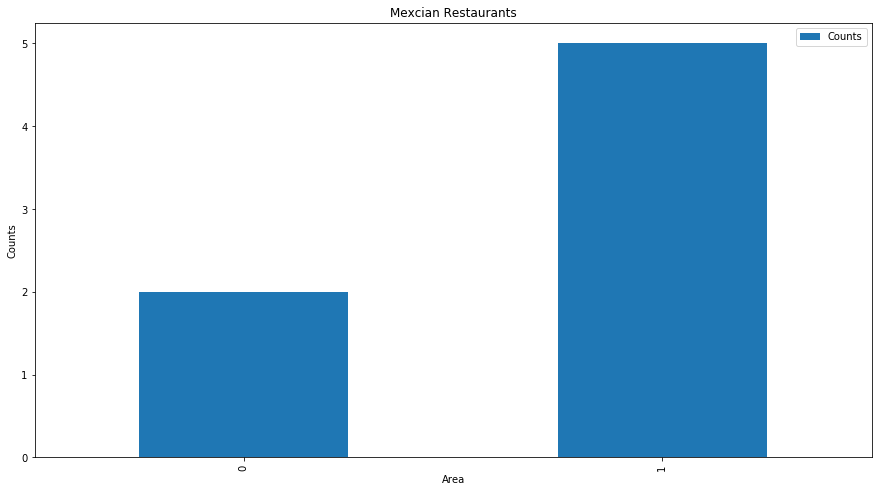

In [68]:
Result.plot(kind='bar', figsize=(15,8))
plt.title('Mexcian Restaurants')
plt.xlabel('Area')
plt.ylabel('Counts')